In [1]:
import importlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from utils import data_manage_utils
from utils import train_utils

importlib.reload(train_utils)
importlib.reload(data_manage_utils)

<module 'utils.data_manage_utils' from 'C:\\Users\\chrig\\OneDrive - Johannes Kepler Universität Linz (1)\\Masterarbeit\\PythonWorkspace\\utils\\data_manage_utils.py'>

In [2]:
pert_result_path = "./pert_output/NB/2023_03_17-0954/"
pert_result_df_path = pert_result_path + "pert_out_df.pkl"
pert_result_model_path = pert_result_path + "model_path.txt"
with open(pert_result_model_path,'r') as file:
    model_path = file.read().rstrip()

pert_df = pd.read_pickle(pert_result_df_path)
pert_df

,ARR_MIN_OF_DAY_COS,WINGLETS(YN),CRS_ELAPSED_TIME(MINS),NR_PREV_ARR_FLIGHTS(1HR),MTOW(KG),TEMP(C),REL_HUMIDITY(PERCENT),WIND_DRCT(DEG),WIND_SPEED(KMH),SEA_LEVEL_PRESSURE(MILLIBAR),...,08R/26L,09L/27R,09R/27L,10/28,ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN,y_true,pert_id,y
0,0.028190,1,162.0,17,78000.133912,17.777778,91.575,100.0,20.372,1007.3000,...,3.0,1.0,1.0,3.0,0.974928,-0.222521,-0.999603,2,TEMP(C)<7029487>,2
1,0.028190,1,162.0,17,78000.133912,17.767778,91.575,100.0,20.372,1007.3000,...,3.0,1.0,1.0,3.0,0.974928,-0.222521,-0.999603,2,TEMP(C)<7029487>,2
2,0.028190,1,162.0,17,78000.133912,17.787778,91.575,100.0,20.372,1007.3000,...,3.0,1.0,1.0,3.0,0.974928,-0.222521,-0.999603,2,TEMP(C)<7029487>,2
3,0.028190,1,162.0,17,78000.133912,17.757778,91.575,100.0,20.372,1007.3000,...,3.0,1.0,1.0,3.0,0.974928,-0.222521,-0.999603,2,TEMP(C)<7029487>,2
4,0.028190,1,162.0,17,78000.133912,17.797778,91.575,100.0,20.372,1007.3000,...,3.0,1.0,1.0,3.0,0.974928,-0.222521,-0.999603,2,TEMP(C)<7029487>,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12783478,-0.675095,0,71.0,58,53523.856000,22.777778,35.460,100.0,7.408,1020.3035,...,3.0,0.0,0.0,3.0,0.433884,-0.900969,-0.737731,0,SEA_LEVEL_PRESSURE(MILLIBAR)<9532146>,0
12783479,-0.675095,0,71.0,58,53523.856000,22.777778,35.460,100.0,7.408,1020.2960,...,3.0,0.0,0.0,3.0,0.433884,-0.900969,-0.737731,0,SEA_LEVEL_PRESSURE(MILLIBAR)<9532146>,0
12783480,-0.675095,0,71.0,58,53523.856000,22.777778,35.460,100.0,7.408,1020.3040,...,3.0,0.0,0.0,3.0,0.433884,-0.900969,-0.737731,0,SEA_LEVEL_PRESSURE(MILLIBAR)<9532146>,0
12783481,-0.675095,0,71.0,58,53523.856000,22.777778,35.460,100.0,7.408,1020.2955,...,3.0,0.0,0.0,3.0,0.433884,-0.900969,-0.737731,0,SEA_LEVEL_PRESSURE(MILLIBAR)<9532146>,0


In [3]:
y_test_pred = pd.read_pickle("./../training/training_results/" + model_path + "y_test_pred.pkl")
y_test_true = pd.read_pickle("./../training/processed_files/NEW/y_test_df.pkl")
y_test_pred

,y_test_pred
0,2
1,1
2,0
3,1
4,0
...,...
69770,0
69771,0
69772,0
69773,0


[Text(0, 0, '53570'), Text(0, 0, '6211'), Text(0, 0, '9994')]

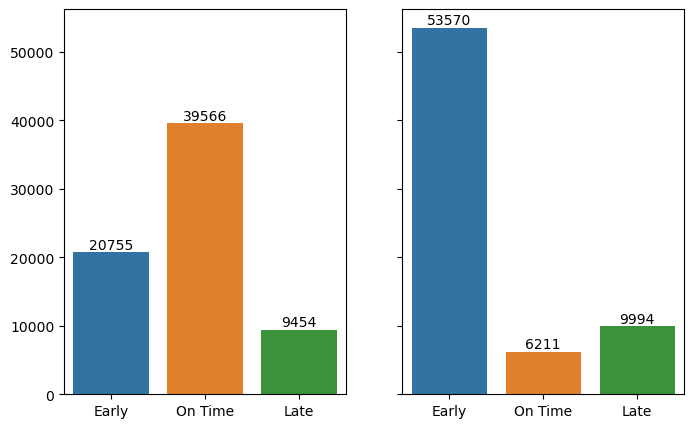

In [4]:
fig, axes = plt.subplots(1,2,figsize=(8,5), sharey=True)
sns.barplot(x=["Early", "On Time", "Late"], y=list(y_test_true.value_counts().sort_index()), ax=axes[0])
sns.barplot(x=["Early", "On Time", "Late"], y=list(y_test_pred.value_counts().sort_index()), ax=axes[1])
axes[0].bar_label(axes[0].containers[0])
axes[1].bar_label(axes[1].containers[0])

In [5]:
def print_measures(y_pred, y_true, true_labels):
    y_pred = y_pred[y_pred.columns[0]]
    y_true = y_true[y_true.columns[0]]
    print(20*"-")
    print(f"Global measures")
    print(f"Accuracy: {accuracy_score(y_true=y_true, y_pred=y_pred, normalize=True):.5f}")
    print(f"Precision-µ: {precision_score(y_true=y_true, y_pred=y_pred, average='micro'):.5f}")
    print(f"Recall-µ: {recall_score(y_true=y_true, y_pred=y_pred, average='micro'):.5f}")
    print(f"F1-Score-µ: {f1_score(y_true=y_true, y_pred=y_pred, average='micro'):.5f}")
    print("=")
    print(f"Precision-M: {precision_score(y_true=y_true, y_pred=y_pred, average='macro'):.5f}")
    print(f"Recall-M: {recall_score(y_true=y_true, y_pred=y_pred, average='macro'):.5f}")
    print(f"F1-Score-M: {f1_score(y_true=y_true, y_pred=y_pred, average='macro'):.5f}")
    for label in true_labels:
        if (label in y_pred) or (label in y_true):
            y_pred_filtered = [1 if val == label else 0 for val in y_pred]
            y_true_filtered = [1 if val == label else 0 for val in y_true]
            print(20*"-")
            print(f"Measures for label '{label}'")
            print(f"Precision score: {precision_score(y_true=y_true_filtered, y_pred=y_pred_filtered):.5f}")
            print(f"Recall score: {recall_score(y_true=y_true_filtered, y_pred=y_pred_filtered):.5f}")

print_measures(y_test_pred, y_test_true, [0,1,2])

--------------------
Global measures
Accuracy: 0.34906
Precision-µ: 0.34906
Recall-µ: 0.34906
F1-Score-µ: 0.34906
=
Precision-M: 0.42206
Recall-M: 0.41734
F1-Score-M: 0.31576
--------------------
Measures for label '0'
Precision score: 0.32458
Recall score: 0.83777
--------------------
Measures for label '1'
Precision score: 0.64563
Recall score: 0.10135
--------------------
Measures for label '2'
Precision score: 0.29598
Recall score: 0.31288


In [6]:
X_pert_res = pert_df.groupby("pert_id").agg({'y':['min','max']})["y"]
X_pert_res

,min,max
pert_id,,
08L/26R<10001167>,0,0
08L/26R<10002056>,0,0
08L/26R<10002240>,0,0
08L/26R<10002279>,1,1
08L/26R<10002862>,2,2
...,...,...
WINGLETS(YN)<9998545>,0,0
WINGLETS(YN)<9998560>,0,0
WINGLETS(YN)<9998781>,0,0


In [7]:
pert_alerts = X_pert_res[~(X_pert_res["min"] == X_pert_res["max"])]
pert_alerts

,min,max
pert_id,,
08L/26R<10007235>,0,2
08L/26R<10007491>,0,2
08L/26R<10007743>,0,2
08L/26R<10009084>,0,2
08L/26R<10011357>,1,2
...,...,...
WINGLETS(YN)<9766744>,1,2
WINGLETS(YN)<9766782>,1,2
WINGLETS(YN)<9766855>,1,2


In [8]:
list(pert_alerts.index)
pert_df[pert_df["pert_id"].isin(list(pert_alerts.index))]

,ARR_MIN_OF_DAY_COS,WINGLETS(YN),CRS_ELAPSED_TIME(MINS),NR_PREV_ARR_FLIGHTS(1HR),MTOW(KG),TEMP(C),REL_HUMIDITY(PERCENT),WIND_DRCT(DEG),WIND_SPEED(KMH),SEA_LEVEL_PRESSURE(MILLIBAR),...,08R/26L,09L/27R,09R/27L,10/28,ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN,y_true,pert_id,y
61674,0.999189,0,175.0,10,79015.7264,19.388889,65.56,290.0,25.002,999.6000,...,3.0,3.0,3.0,3.0,0.433884,-0.900969,0.040266,1,TEMP(C)<7808435>,2
61675,0.999189,0,175.0,10,79015.7264,19.378889,65.56,290.0,25.002,999.6000,...,3.0,3.0,3.0,3.0,0.433884,-0.900969,0.040266,1,TEMP(C)<7808435>,2
61676,0.999189,0,175.0,10,79015.7264,19.398889,65.56,290.0,25.002,999.6000,...,3.0,3.0,3.0,3.0,0.433884,-0.900969,0.040266,1,TEMP(C)<7808435>,2
61677,0.999189,0,175.0,10,79015.7264,19.368889,65.56,290.0,25.002,999.6000,...,3.0,3.0,3.0,3.0,0.433884,-0.900969,0.040266,1,TEMP(C)<7808435>,2
61678,0.999189,0,175.0,10,79015.7264,19.408889,65.56,290.0,25.002,999.6000,...,3.0,3.0,3.0,3.0,0.433884,-0.900969,0.040266,1,TEMP(C)<7808435>,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12167270,0.136514,0,124.0,60,79015.7264,12.222222,74.26,310.0,29.632,998.5035,...,1.0,1.0,3.0,3.0,0.000000,1.000000,-0.990638,1,SEA_LEVEL_PRESSURE(MILLIBAR)<5946217>,0
12167271,0.136514,0,124.0,60,79015.7264,12.222222,74.26,310.0,29.632,998.4960,...,1.0,1.0,3.0,3.0,0.000000,1.000000,-0.990638,1,SEA_LEVEL_PRESSURE(MILLIBAR)<5946217>,2
12167272,0.136514,0,124.0,60,79015.7264,12.222222,74.26,310.0,29.632,998.5040,...,1.0,1.0,3.0,3.0,0.000000,1.000000,-0.990638,1,SEA_LEVEL_PRESSURE(MILLIBAR)<5946217>,0
12167273,0.136514,0,124.0,60,79015.7264,12.222222,74.26,310.0,29.632,998.4955,...,1.0,1.0,3.0,3.0,0.000000,1.000000,-0.990638,1,SEA_LEVEL_PRESSURE(MILLIBAR)<5946217>,2


In [9]:
pert_outcomes = pert_df[pert_df.columns[-3:]]
pert_outcomes

,y_true,pert_id,y
0,2,TEMP(C)<7029487>,2
1,2,TEMP(C)<7029487>,2
2,2,TEMP(C)<7029487>,2
3,2,TEMP(C)<7029487>,2
4,2,TEMP(C)<7029487>,2
...,...,...,...
12783478,0,SEA_LEVEL_PRESSURE(MILLIBAR)<9532146>,0
12783479,0,SEA_LEVEL_PRESSURE(MILLIBAR)<9532146>,0
12783480,0,SEA_LEVEL_PRESSURE(MILLIBAR)<9532146>,0
12783481,0,SEA_LEVEL_PRESSURE(MILLIBAR)<9532146>,0


In [10]:
def disassemble_pert_id(row):
    s = row["pert_id"].split("<")
    col = s[0]
    idx = s[1][:-1]
    val = row[col]
    return [col,val,idx]

col_values = pert_df.apply(lambda row: disassemble_pert_id(row), axis=1)

In [11]:
col_values = pd.DataFrame(list(col_values.to_numpy()), columns=["column","val","idx"])
col_values

,column,val,idx
0,TEMP(C),17.777778,7029487
1,TEMP(C),17.767778,7029487
2,TEMP(C),17.787778,7029487
3,TEMP(C),17.757778,7029487
4,TEMP(C),17.797778,7029487
...,...,...,...
12783478,SEA_LEVEL_PRESSURE(MILLIBAR),1020.303500,9532146
12783479,SEA_LEVEL_PRESSURE(MILLIBAR),1020.296000,9532146
12783480,SEA_LEVEL_PRESSURE(MILLIBAR),1020.304000,9532146
12783481,SEA_LEVEL_PRESSURE(MILLIBAR),1020.295500,9532146


In [12]:
pert_outcomes["column"] = list(col_values["column"])
pert_outcomes["val"] = list(col_values["val"])
pert_outcomes["idx"] = list(col_values["idx"])
pert_outcomes

C:\Users\chrig\AppData\Local\Temp\ipykernel_7460\1567013798.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pert_outcomes["column"] = list(col_values["column"])
C:\Users\chrig\AppData\Local\Temp\ipykernel_7460\1567013798.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pert_outcomes["val"] = list(col_values["val"])
C:\Users\chrig\AppData\Local\Temp\ipykernel_7460\1567013798.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

,y_true,pert_id,y,column,val,idx
0,2,TEMP(C)<7029487>,2,TEMP(C),17.777778,7029487
1,2,TEMP(C)<7029487>,2,TEMP(C),17.767778,7029487
2,2,TEMP(C)<7029487>,2,TEMP(C),17.787778,7029487
3,2,TEMP(C)<7029487>,2,TEMP(C),17.757778,7029487
4,2,TEMP(C)<7029487>,2,TEMP(C),17.797778,7029487
...,...,...,...,...,...,...
12783478,0,SEA_LEVEL_PRESSURE(MILLIBAR)<9532146>,0,SEA_LEVEL_PRESSURE(MILLIBAR),1020.303500,9532146
12783479,0,SEA_LEVEL_PRESSURE(MILLIBAR)<9532146>,0,SEA_LEVEL_PRESSURE(MILLIBAR),1020.296000,9532146
12783480,0,SEA_LEVEL_PRESSURE(MILLIBAR)<9532146>,0,SEA_LEVEL_PRESSURE(MILLIBAR),1020.304000,9532146
12783481,0,SEA_LEVEL_PRESSURE(MILLIBAR)<9532146>,0,SEA_LEVEL_PRESSURE(MILLIBAR),1020.295500,9532146


In [13]:
pert_view = pert_outcomes.groupby(["pert_id","y_true"]).first().reset_index().set_index('pert_id')
pert_view

,y_true,y,column,val,idx
pert_id,,,,,
08L/26R<10001167>,2,0,08L/26R,3.0,10001167
08L/26R<10002056>,1,0,08L/26R,3.0,10002056
08L/26R<10002240>,0,0,08L/26R,3.0,10002240
08L/26R<10002279>,1,1,08L/26R,1.0,10002279
08L/26R<10002862>,1,2,08L/26R,1.0,10002862
...,...,...,...,...,...
WINGLETS(YN)<9998545>,2,0,WINGLETS(YN),1.0,9998545
WINGLETS(YN)<9998560>,1,0,WINGLETS(YN),1.0,9998560
WINGLETS(YN)<9998781>,0,0,WINGLETS(YN),1.0,9998781


In [14]:
pert_view["pert_alarm"] = [idx in pert_alerts.index for idx in pert_view.index]
faulty = pert_view[pert_view["y_true"] != pert_view["y"]]
faulty_and_changed = faulty[faulty["pert_alarm"]]
pert_view["class_error"] = [idx in faulty.index for idx in pert_view.index]
pert_view

,y_true,y,column,val,idx,pert_alarm,class_error
pert_id,,,,,,,
08L/26R<10001167>,2,0,08L/26R,3.0,10001167,False,True
08L/26R<10002056>,1,0,08L/26R,3.0,10002056,False,True
08L/26R<10002240>,0,0,08L/26R,3.0,10002240,False,False
08L/26R<10002279>,1,1,08L/26R,1.0,10002279,False,False
08L/26R<10002862>,1,2,08L/26R,1.0,10002862,False,True
...,...,...,...,...,...,...,...
WINGLETS(YN)<9998545>,2,0,WINGLETS(YN),1.0,9998545,False,True
WINGLETS(YN)<9998560>,1,0,WINGLETS(YN),1.0,9998560,False,True
WINGLETS(YN)<9998781>,0,0,WINGLETS(YN),1.0,9998781,False,False


In [15]:
print(f"Wrong classification records for all perturbation options: {(len(pert_view[pert_view['class_error']])/len(pert_view))*100:.3f}%")
print(f"# of perturbation alarms for all perturbation options: {(len(pert_view[pert_view['pert_alarm']])/len(pert_view))*100:.3f}%")
print(f"Alarmed perturbation options that were wrongly classified: {(len(pert_view[pert_view['pert_alarm'] & pert_view['class_error']])/len(pert_view[pert_view['pert_alarm']]))*100:.3f}%")
print(f"Percentage of wrong classifications that were alarmed: {(len(pert_view[pert_view['pert_alarm'] & pert_view['class_error']])/len(pert_view[pert_view['class_error']]))*100:.3f}%")
print(f"Percentage of correct classifications that were alarmed: {(len(pert_view[pert_view['pert_alarm'] & pert_view['class_error']])/len(pert_view[pert_view['class_error'] == False]))*100:.3f}%")
print(f"Percentage of not alarmed options that were wrongly classified: {(len(pert_view[pert_view['class_error']])/len(pert_view[pert_view['pert_alarm'] == False]))*100:.3f}%")

Wrong classification records for all perturbation options: 65.377%
# of perturbation alarms for all perturbation options: 14.899%
Alarmed perturbation options that were wrongly classified: 67.320%
Percentage of wrong classifications that were alarmed: 15.342%
Percentage of correct classifications that were alarmed: 28.970%
Percentage of not alarmed options that were wrongly classified: 76.823%


In [16]:
cols = list(pert_view["column"].value_counts().index)
cols

['08L/26R',
 '08R/26L',
 'WIND_SPEED(KMH)',
 'WIND_DRCT(DEG)',
 'VISIBILITY(MILES)',
 'TEMP(C)',
 'SEA_LEVEL_PRESSURE(MILLIBAR)',
 'REL_HUMIDITY(PERCENT)',
 'NR_PREV_ARR_FLIGHTS(1HR)',
 'MTOW(KG)',
 'EVENT_TS',
 'EVENT_SN',
 'EVENT_RA',
 'EVENT_IC',
 'EVENT_FG',
 'EVENT_DZ',
 'EVENT_BR',
 'CRS_ELAPSED_TIME(MINS)',
 '10/28',
 '09R/27L',
 '09L/27R',
 'WINGLETS(YN)']

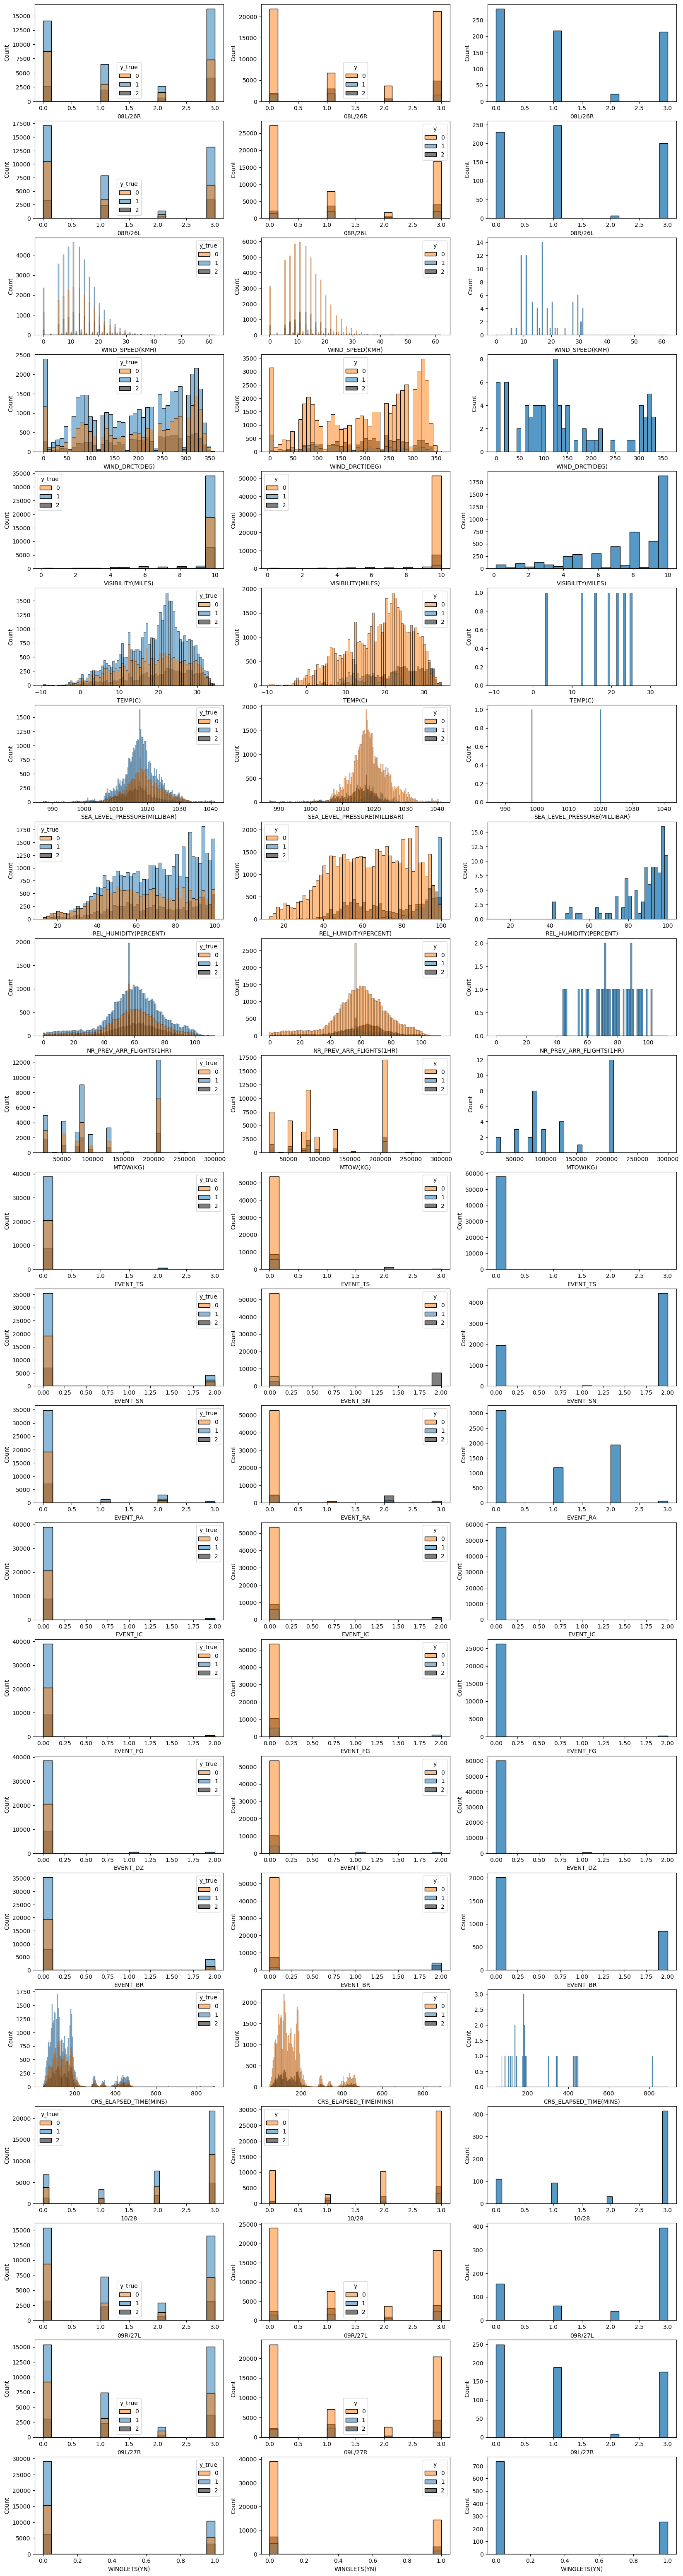

In [17]:
pert_view_alert = pert_view[pert_view["pert_alarm"] == True]

fig, axes = plt.subplots(22,3, figsize=(20,80))
count = 0
for col in cols:
    p_row = int(count / 3)
    bins = np.histogram_bin_edges(pert_view[pert_view["column"] == col]["val"], bins='auto')
    ax = sns.histplot(data = pert_view[pert_view["column"] == col], x = "val", hue="y_true", ax=axes[p_row][0], bins=bins, palette = ["C1", "C0", "k"])
    ax.set(xlabel=col)
    ax = sns.histplot(data = pert_view[pert_view["column"] == col], x = "val", hue="y", ax=axes[p_row][1], bins=bins, palette = ["C1", "C0", "k"])
    ax.set(xlabel=col)
    ax = sns.histplot(data = pert_view_alert[pert_view_alert["column"] == col], x = "val", ax=axes[p_row][2], bins = bins)
    ax.set(xlabel=col)
    count += 3


In [26]:
pert_view.groupby("idx").agg(
    original_val=pd.NamedAgg(column="val", aggfunc="first")
)

,original_val
idx,
10001167,3.0
10002056,3.0
10002240,3.0
10002279,1.0
10002862,1.0
...,...
9998545,3.0
9998560,1.0
9998781,3.0


In [10]:
pert_view[pert_view['didChange'] & pert_view["faulty"]]

,y_true,y,didChange,faulty
pert_id,,,,
08L/26R<10029263>,0,2,True,True
08L/26R<10032747>,1,2,True,True
08L/26R<10061472>,2,1,True,True
08L/26R<10076479>,1,0,True,True
08L/26R<10089669>,1,2,True,True
...,...,...,...,...
WINGLETS(YN)<9941621>,1,0,True,True
WINGLETS(YN)<9941646>,1,0,True,True
WINGLETS(YN)<9947846>,1,0,True,True


In [11]:
pert_df.groupby("pert_id").agg({'y':['min','max']})["y"]

,min,max
pert_id,,
08L/26R<10001167>,1,1
08L/26R<10002056>,1,1
08L/26R<10002240>,1,1
08L/26R<10002279>,1,1
08L/26R<10002862>,1,1
...,...,...
WINGLETS(YN)<9998545>,1,1
WINGLETS(YN)<9998560>,1,1
WINGLETS(YN)<9998781>,1,1


In [12]:
ID = "1HOUR_PRECIPITATION(INCH)<10271181>"
NAME = ID.split("<")[0]
pert_df[pert_df["pert_id"] == ID][[NAME,"y"]]

KeyError: "['1HOUR_PRECIPITATION(INCH)'] not in index"